In [2]:
import os
import numpy as np
import mne

In [3]:
sample_data_folder='/home/sultan/mne_data/MNE-sample-data/'
# path="/home/sultan/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-meg-eeg-inv.fif"
# raw = mne.io.read_raw_fif(path)
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /home/sultan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


In [4]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 5 Axes>

<Figure size 640x480 with 5 Axes>

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 20 components
Fitting ICA took 7.7s.
    Using multitaper spectrum estimation with 7 DPSS windows


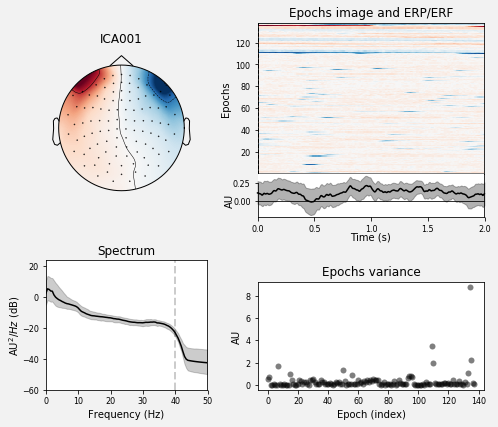

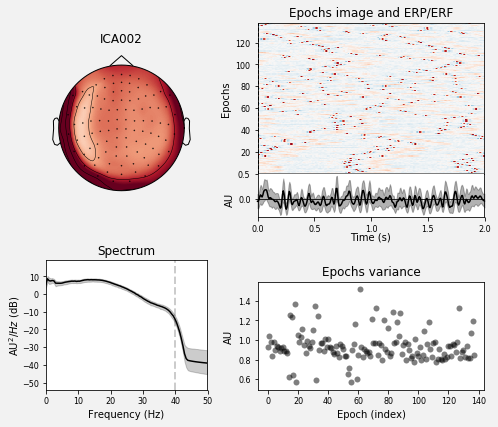

[<Figure size 504x432 with 5 Axes>, <Figure size 504x432 with 5 Axes>]

In [5]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)